<a href="https://colab.research.google.com/github/zakiahintan/Kelas_Dasar/blob/main/M4P1V3_Slicing_Transformation_Group_By.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Transformations

Data transformations adalah perubahan data yang dilakukan untuk kepentingan tertentu seperti menambahkan kolom, merubah tipe data, menghapus sebagaian data, dan lain-lain. Data yang akan digunakan sebagai bahan penjelasan adalah `Super-Store-Dataset.csv`. Pertama kita import dataset tersebut:

In [ ]:
# Import Modul
import pandas as pd

In [ ]:
from google.colab import files
data = files.upload()

Saving Super-Store-Dataset.csv - Super-Store-Dataset.csv.csv to Super-Store-Dataset.csv - Super-Store-Dataset.csv.csv


In [ ]:
df = pd.read_csv('Super-Store-Dataset.csv - Super-Store-Dataset.csv.csv')
df.head(3)

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714


## Menghapus Data

In [ ]:
df_2=df.copy()
df_2.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164


Untuk melakukan penghapusan data, Pandas memiliki salah atu attribute yang terkait yaitu .drop(). Syntax dari attribute ini adalah sebagai berikut:

```python
data.drop(labels=["label_1","label_2","label_3"], # List untuk indeks(baris) yang akan dihapus atau nama kolom 
          axis=1, # 0 untuk menghapus baris dan 1 untuk menghapus kolom
          inplace=False) #Jika inplace True maka data akan diperbaharui dengan drop
```

**Menghapus Data Kolom**

In [ ]:
df_2_baru=df_2.drop(labels=['order_date',	'customer_id'],
                    axis=1,
                    inplace=False)
print(df_2.columns)
print(df_2_baru.columns)

Index(['order_id', 'order_date', 'customer_id', 'segment', 'category',
       'sub_category', 'sales', 'quantity', 'profit'],
      dtype='object')
Index(['order_id', 'segment', 'category', 'sub_category', 'sales', 'quantity',
       'profit'],
      dtype='object')


**Menghapus Data Baris**

In [ ]:
df_2_baru=df_2.drop(labels=[10,20,30,40,50,60],
                    axis=0,
                    inplace=False)
print(df_2.shape)
print(df_2_baru.shape)

(9988, 9)
(9982, 9)


## Menambahkan Data Kolom

Untuk menambahkan kolom baru pada suatu dataframe dapat dilakukan menggunakan sytaxs berikut:

```pyhton
data['Nama_Kolom_Baru']=sequece_pengisi_kolom
```

In [ ]:
df_2['total_sales'] = df_2['sales']*df_2['quantity']
df_2.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit,total_sales
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136,261.96261.96
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582,731.94731.94731.94
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714,14.6214.62
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031,9.575.7759.575.7759.575.7759.575.7759.575.775
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164,22.36822.368


## Mengurutkan Data

Pengurutan dataframe dapat menggunakan attribute `.sort_values()` dengan syntax berikut:

```python
df.sort_values(by='col1',          # Mengurutkan berdasar kolom tertentu
               ascending=False)    # Menaik(ascending=True) atau menurun(ascending=False)
```

In [ ]:
df_2_urut=df_2.sort_values(by='segment',
                           ascending=True)
df_2_urut

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit,total_sales
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136,261.96261.96
5505,CA-2015-168529,10/8/2015,MB-17305,Consumer,Furniture,Furnishings,145.9,5,62.737,145.9145.9145.9145.9145.9
5504,CA-2016-150000,4/8/2016,PG-18820,Consumer,Office Supplies,Envelopes,17.92,4,8.6016,17.9217.9217.9217.92
5503,US-2016-162026,10/8/2016,JE-15745,Consumer,Office Supplies,Paper,61.96,2,27.882,61.9661.96
5498,CA-2017-164378,7/15/2017,MM-18055,Consumer,Office Supplies,Paper,8.96,2,4.3904,8.968.96
...,...,...,...,...,...,...,...,...,...,...
6051,CA-2016-124016,9/23/2016,JS-15940,Home Office,Office Supplies,Binders,12.201,7,-97.608,12.20112.20112.20112.20112.20112.20112.201
6050,CA-2016-124016,9/23/2016,JS-15940,Home Office,Furniture,Furnishings,28,4,7.7,28282828
6049,CA-2016-124016,9/23/2016,JS-15940,Home Office,Office Supplies,Paper,11.952,3,4.0338,11.95211.95211.952
699,CA-2015-119291,5/14/2015,JO-15550,Home Office,Office Supplies,Binders,18.588,2,-136.312,18.58818.588


In [ ]:
df_2_urut=df_2.sort_values(by=['segment','category'],
                           ascending=True)
df_2_urut

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit,total_sales
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136,261.96261.96
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582,731.94731.94731.94
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031,9.575.7759.575.7759.575.7759.575.7759.575.775
5,CA-2014-115812,6/9/2014,BH-11710,Consumer,Furniture,Furnishings,48.86,7,141.694,48.8648.8648.8648.8648.8648.8648.86
10,CA-2014-115812,6/9/2014,BH-11710,Consumer,Furniture,Tables,1.706.184,9,853.092,1.706.1841.706.1841.706.1841.706.1841.706.1841...
...,...,...,...,...,...,...,...,...,...,...
9858,CA-2017-113278,1/14/2017,HR-14770,Home Office,Technology,Accessories,159.8,4,70.312,159.8159.8159.8159.8
9872,US-2017-166324,4/20/2017,BE-11455,Home Office,Technology,Phones,122.382,3,-244.764,122.382122.382122.382
9954,CA-2017-141446,9/16/2017,CL-12700,Home Office,Technology,Accessories,18,1,3.24,18
9967,US-2016-103674,12/6/2016,AP-10720,Home Office,Technology,Phones,271.96,5,27.196,271.96271.96271.96271.96271.96


## Mengubah Nama Kolom

Kita dapat merubah nama kolom pada dataframe dengan cara seperti pada contoh berikut:

In [ ]:
df.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164


In [ ]:
# Mengganti nama kolom "profit" menjadi "keuntungan"
df2 = df.rename(columns={"profit":"keuntungan"})
df2.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,keuntungan
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164


# Indexing DataFrame

Index merupakan key identifier dari tiap row/column untuk Series atau Dataframe (sifatnya tidak mutable untuk masing-masing value tapi bisa diganti untuk semua value sekaligus).

Jika tidak disediakan, pandas akan membuat kolom index default secara otomatis sebagai bilangan bulat (integer) dari 0 sampai range jumlah baris data tersebut.

Kolom index dapat terdiri dari

1. satu kolom (single index), atau
2. multiple kolom (disebut dengan hierarchical indexing).

Index dengan multiple kolom ini terjadi karena unique identifier tidak dapat dicapai hanya dengan set index di 1 kolom saja sehingga membutuhkan beberapa kolom yang menjadikan tiap row menjadi unique.

## Single Index

In [ ]:
df_super_store = df

In [ ]:
df_super_store.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164


In [ ]:
print("Index:", df_super_store.index)

print("Columns:", df_super_store.columns)

Index: RangeIndex(start=0, stop=9988, step=1)
Columns: Index(['order_id', 'order_date', 'customer_id', 'segment', 'category',
       'sub_category', 'sales', 'quantity', 'profit'],
      dtype='object')


## Multiple Index

Kita akan coba tunjukkan bagaimana caranya membuat sebuah dataframe dengan multi index

In [ ]:
df_super_store.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164


In [ ]:
# Set multi index df
df_ss = df_super_store.set_index(['order_id', 'order_date', 'customer_id'])
# Print nama dan level dari multi index
for name, level in zip(df_ss.index.names, df_ss.index.levels):
    print(name,':',level)

order_id : Index(['CA-2014-100006', 'CA-2014-100090', 'CA-2014-100293', 'CA-2014-100328',
       'CA-2014-100363', 'CA-2014-100391', 'CA-2014-100678', 'CA-2014-100706',
       'CA-2014-100762', 'CA-2014-100860',
       ...
       'US-2017-167570', 'US-2017-167920', 'US-2017-168116', 'US-2017-168613',
       'US-2017-168690', 'US-2017-168802', 'US-2017-169320', 'US-2017-169488',
       'US-2017-169502', 'US-2017-169551'],
      dtype='object', name='order_id', length=5008)
order_date : Index(['1/1/2017', '1/10/2014', '1/10/2015', '1/10/2016', '1/11/2014',
       '1/11/2016', '1/12/2015', '1/12/2017', '1/13/2014', '1/13/2015',
       ...
       '9/7/2014', '9/7/2015', '9/7/2017', '9/8/2014', '9/8/2015', '9/8/2016',
       '9/8/2017', '9/9/2014', '9/9/2016', '9/9/2017'],
      dtype='object', name='order_date', length=1237)
customer_id : Index(['AA-10315', 'AA-10375', 'AA-10480', 'AA-10645', 'AB-10015', 'AB-10060',
       'AB-10105', 'AB-10150', 'AB-10165', 'AB-10255',
       ...
       '

# Latihan 1

Buatlah multiple index pada df_super_store menggunakan kolom `order_id` dan `customer_id`

In [ ]:
df_ss = df_super_store.set_index(['order_id', 'customer_id'])
for name, level in zip(df_ss.index.names, df_ss.index.levels):
  print(name,':', level)

order_id : Index(['CA-2014-100006', 'CA-2014-100090', 'CA-2014-100293', 'CA-2014-100328',
       'CA-2014-100363', 'CA-2014-100391', 'CA-2014-100678', 'CA-2014-100706',
       'CA-2014-100762', 'CA-2014-100860',
       ...
       'US-2017-167570', 'US-2017-167920', 'US-2017-168116', 'US-2017-168613',
       'US-2017-168690', 'US-2017-168802', 'US-2017-169320', 'US-2017-169488',
       'US-2017-169502', 'US-2017-169551'],
      dtype='object', name='order_id', length=5008)
customer_id : Index(['AA-10315', 'AA-10375', 'AA-10480', 'AA-10645', 'AB-10015', 'AB-10060',
       'AB-10105', 'AB-10150', 'AB-10165', 'AB-10255',
       ...
       'VP-21760', 'VS-21820', 'VT-21700', 'VW-21775', 'WB-21850', 'XP-21865',
       'YC-21895', 'YS-21880', 'ZC-21910', 'ZD-21925'],
      dtype='object', name='customer_id', length=793)


# Slicing Data Frame

### Slicing Berdasarkan Kolom

In [ ]:
df_super_store.order_date

0        11/8/2016
1        11/8/2016
2        6/12/2016
3       10/11/2015
4       10/11/2015
           ...    
9983     1/21/2014
9984     2/26/2017
9985     2/26/2017
9986     2/26/2017
9987      5/4/2017
Name: order_date, Length: 9988, dtype: object

In [ ]:
df_super_store['order_date']

0        11/8/2016
1        11/8/2016
2        6/12/2016
3       10/11/2015
4       10/11/2015
           ...    
9983     1/21/2014
9984     2/26/2017
9985     2/26/2017
9986     2/26/2017
9987      5/4/2017
Name: order_date, Length: 9988, dtype: object

Kita juga dapat mengakses beberapa kolom dataframe menggunakan list nama-nama kolom yang kita inginkan sebagai berikut:

In [ ]:
df_ss1=df_super_store[['order_id','customer_id']]
df_ss1

,order_id,customer_id
0,CA-2016-152156,CG-12520
1,CA-2016-152156,CG-12520
2,CA-2016-138688,DV-13045
3,US-2015-108966,SO-20335
4,US-2015-108966,SO-20335
...,...,...
9983,CA-2014-110422,TB-21400
9984,CA-2017-121258,DB-13060
9985,CA-2017-121258,DB-13060
9986,CA-2017-121258,DB-13060


## Slicing Berdasarkan Baris

In [ ]:
# Mengakses 5 baris data teratas
df_super_store[:5]

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164


In [ ]:
# Mengakses data dari baris 0 hingga baris sebelum 6
df_super_store[3:6]

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164
5,CA-2014-115812,6/9/2014,BH-11710,Consumer,Furniture,Furnishings,48.86,7,141.694


In [ ]:
# Mengakses 5 baris data terakhir
df_super_store[-5:]

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
9983,CA-2014-110422,1/21/2014,TB-21400,Consumer,Furniture,Furnishings,25.248,3,4.1028
9984,CA-2017-121258,2/26/2017,DB-13060,Consumer,Furniture,Furnishings,91.96,2,156.332
9985,CA-2017-121258,2/26/2017,DB-13060,Consumer,Technology,Phones,258.576,2,193.932
9986,CA-2017-121258,2/26/2017,DB-13060,Consumer,Office Supplies,Paper,29.6,4,13.32
9987,CA-2017-119914,5/4/2017,CC-12220,Consumer,Office Supplies,Appliances,243.16,2,72.948


## Slicing menggunakan attribute .iloc

Kita dapat melakukan slicing berdasarkan **baris & kolom** menggunakan attribut .iloc:

In [ ]:
# Mengakses 10 baris pertama kolom 2 dan 3
df_super_store.iloc[:10,1:3]

,order_date,customer_id
0,11/8/2016,CG-12520
1,11/8/2016,CG-12520
2,6/12/2016,DV-13045
3,10/11/2015,SO-20335
4,10/11/2015,SO-20335
5,6/9/2014,BH-11710
6,6/9/2014,BH-11710
7,6/9/2014,BH-11710
8,6/9/2014,BH-11710
9,6/9/2014,BH-11710


In [ ]:
# Mengakses semua baris pada kolom 2 dan 3
df_super_store.iloc[:,1:3]

,order_date,customer_id
0,11/8/2016,CG-12520
1,11/8/2016,CG-12520
2,6/12/2016,DV-13045
3,10/11/2015,SO-20335
4,10/11/2015,SO-20335
...,...,...
9983,1/21/2014,TB-21400
9984,2/26/2017,DB-13060
9985,2/26/2017,DB-13060
9986,2/26/2017,DB-13060


In [ ]:
# Mengakses 5 baris data pertama semua kolom
df_super_store.iloc[:5,:]

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164


### Slicing Dengan Kriteria

Melakukan filter berdasarkan kriteria tertentu adalah hal yang paling sering dilakukan oleh seorang data analis atau data saintis. Berikut adalah beberapa contoh filtering menggunakan pandas.

In [ ]:
# Mengambil data dari df__sperstore dengan sentimen positif
df_1=df_super_store[df_super_store['category']=="Furniture"]
df_1

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
5,CA-2014-115812,6/9/2014,BH-11710,Consumer,Furniture,Furnishings,48.86,7,141.694
10,CA-2014-115812,6/9/2014,BH-11710,Consumer,Furniture,Tables,1.706.184,9,853.092
...,...,...,...,...,...,...,...,...,...
9956,CA-2015-168088,3/19/2015,CM-12655,Home Office,Furniture,Bookcases,3.834.656,4,-676.704
9958,CA-2016-146374,12/5/2016,HE-14800,Corporate,Furniture,Furnishings,13.4,1,6.432
9974,US-2015-151435,9/6/2015,SW-20455,Consumer,Furniture,Tables,85.98,1,223.548
9983,CA-2014-110422,1/21/2014,TB-21400,Consumer,Furniture,Furnishings,25.248,3,4.1028


In [ ]:
# mengambil data dengan lebih dari 1 kriteria
df_2=df_super_store[(df_super_store['category']=="Furniture") & (df_super_store['quantity']>=3)]
df_2

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
5,CA-2014-115812,6/9/2014,BH-11710,Consumer,Furniture,Furnishings,48.86,7,141.694
10,CA-2014-115812,6/9/2014,BH-11710,Consumer,Furniture,Tables,1.706.184,9,853.092
24,CA-2015-106320,9/25/2015,EB-13870,Consumer,Furniture,Tables,1044.63,3,2.402.649
...,...,...,...,...,...,...,...,...,...
9925,CA-2015-104948,11/13/2015,KH-16510,Consumer,Furniture,Bookcases,683.332,4,-40.196
9932,CA-2016-169824,12/12/2016,NS-18640,Corporate,Furniture,Furnishings,60.35,5,199.155
9941,CA-2017-121559,6/1/2017,HW-14935,Corporate,Furniture,Chairs,1925.88,6,5.392.464
9956,CA-2015-168088,3/19/2015,CM-12655,Home Office,Furniture,Bookcases,3.834.656,4,-676.704


In [ ]:
# mengambil data dengan karakter tertentu (customer_id mengandung CG)
df_3=df_super_store[df_super_store.customer_id.str.contains('CG')]
df_3

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
933,CA-2016-140081,6/20/2016,CG-12040,Home Office,Office Supplies,Paper,45.056,8,152.064
934,CA-2016-140081,6/20/2016,CG-12040,Home Office,Office Supplies,Binders,29.718,6,-217.932
935,CA-2016-140081,6/20/2016,CG-12040,Home Office,Office Supplies,Paper,15.552,3,5.4432
936,CA-2016-140081,6/20/2016,CG-12040,Home Office,Office Supplies,Appliances,447.696,2,335.772
1476,US-2017-104955,3/19/2017,CG-12040,Home Office,Office Supplies,Labels,28.91,7,132.986
2205,CA-2016-164350,9/10/2016,CG-12040,Home Office,Office Supplies,Art,67.56,3,8.445
5075,CA-2017-143217,11/11/2017,CG-12040,Home Office,Office Supplies,Binders,18.24,3,8.5728
5488,CA-2017-164098,1/26/2017,CG-12520,Consumer,Office Supplies,Storage,18.16,2,1.816


## Summarize DataFrame

Untuk melihat nilai-nilai statistik seperti mean, min, max dll dapat dilakukan untuk masing-masing kolom sebagai berikut:

In [ ]:
# Menghitung rata-rata variabel petal_length
df_super_store.quantity.mean()

3.789146976371646

In [ ]:
# Menghitung nilai minimum variabel petal_length
df_super_store.quantity.min()

1

In [ ]:
# Menghitung nilai maximum variabel petal_length
df_super_store.profit.max()

'999.408'

In [ ]:
# Menghitung nilai jumlahan variabel petal_length
df_super_store.profit.sum()

'419.136219.5826.8714-383.0312.5164141.6941.9656907.1525.782534.47853.092683.5685.44321.325.922-123.858-3.816133.1769.992.482416.0117.3845.0596156.884-10.1962.402.6494.222411.7741-16.650.522-70.53215.5251.10169.7092-5.7153.5469.94681.234.737-147.96335.415-469.764-15.147417.564165.5643.8949.5616197.7148.20628.47844.956.104179.634353.3462.9568170.9816.25662.986.85552.1415.5527.0986.98883.316.3620.846.15129.3612689.631223.328-152.2251.113.02462.988356.6361.7318.763-1.143.9121.213-18.196-19.344-58.2482.724-14.475562.0328.03524.1726.2031628.075-489.549332.1566.79662.9568138.5726.6338.27823.11046.2208165.354161.504-3.788405.426179.592225.852226.184-107.973-30.39611.7208-268.758-38.385-258.174176.0162.09941.073867.99210.909622.788133.476145.3481.6527.4925440.3161.653.813-1.157.156183.45613.878634.36851.759197.316-85.794-407.682-18.30830.499-91.602262.416-11.99429.3646.97329.6192166.5683.4561.9698266.616184.464206.97610.352.38145.104268.9762.182.518201.57912.90961.038.0155.9988585.552806.28517

Fungsi Deskripsi:
```python
 mean()    #Hitung rata-rata sequence 
 sum()     #Hitung jumlah nilai sequence 
 size()    #Hitung ukuran sequence 
 count()   #Hitung jumlah sequence 
 std()     #Standar deviasi sequence 
 var()     #Hitung varians sequence 
 sem ()    #Kesalahan standar rata-rata sequence  
 min ()    #Hitung minimum nilai grup 
 max ()    #Hitung maks nilai grup
 ```

# Aggregation & GroupBy

Groupby memiliki konsep untuk

1. **Split**: melakukan indexing/multi-indexing dengan apa yang di specify as groupby menjadi kelompok
2. **Apply**: menerapkan fungsi pada masing-masing kelompok tersebut
3. **Combine**: mengumpulkan semua hasil fungsi dari tiap kelompok kembali menjadi dataframe

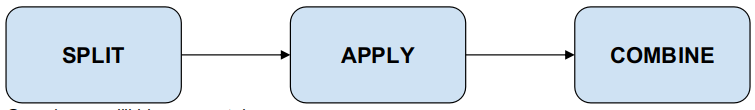

## Dataset

In [ ]:
df = df_super_store
df.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,9.575.775,5,-383.031
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164


## GroupBy Satu Variabel dengan Satu Fungsi Aggregat

Kita dapat melakukan groupby terhadap satu buah variabel(contoh: category) dengan menggunakan sebuah fungsi aggregat(mean). 

In [ ]:
#Groupby berdasarkan variabel 'category', fungsi aggregat `mean`
hasil_group_by=df.groupby('category').mean() 
hasil_group_by

,quantity
category,
Furniture,3.785007
Office Supplies,3.801195
Technology,3.754481


In [ ]:
#Groupby berdasarkan variabel 'category', fungsi aggregat `mean`
hasil_group_by=  df.groupby(['category','sales','profit']).mean() 
hasil_group_by

quantity
category   sales     profit              
Furniture  07.04     3.0976           4.0
           08.01     3.0438           3.0
           1.004.024 -1.129.527       7.0
           1.004.976 -1.758.708       6.0
           1.007.232 755.424          6.0
...                                   ...
Technology 99.99     419.958          1.0
                     439.956          1.0
           998.85    -199.77          5.0
           999.96    2.299.908        4.0
           999.98    449.991          2.0

[7662 rows x 1 columns]

## GroupBy Multivariabel dengan Satu Fungsi Aggregat

In [ ]:
sub_category=df.groupby(['category','sub_category'])[['sales','quantity','profit']].mean()
sub_category

quantity
category        sub_category          
Furniture       Bookcases     3.807018
                Chairs        3.818476
                Furnishings   3.723093
                Tables        3.890282
Office Supplies Appliances    3.710300
                Art           3.768844
                Binders       3.922521
                Envelopes     3.566929
                Fasteners     4.211982
                Labels        3.846154
                Paper         3.779562
                Storage       3.732861
                Supplies      3.405263
Technology      Accessories   3.840000
                Copiers       3.406250
                Machines      3.796460
                Phones        3.699663

## GroupBy dengan Banyak Fungsi Aggregat

Untuk menampung banyak fungsi agregat, atau ketika kita menginginkan fungsi agregat yang berbeda-beda pada masing-masing variabel, kita dapat menuliskannya dalam sebuah dictionary sebagai berikut:

In [ ]:
import numpy as np

In [ ]:
sub_category=df.groupby(['category'])[['sales','quantity','profit']].agg
({   
    'sales':min,
    'quantity':max,
    'profit': np.mean
})
sub_category

<bound method DataFrameGroupBy.aggregate of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f2c00094610>>

## GroupBy dengan Fungsi Aggregat Custom

In [ ]:
def data_range(series):
  return series.max() - series.min()

sub_category=df.groupby(['sub_category','category'])[['sales','quantity','profit']].agg(data_range)
sub_category

,,quantity
sub_category,category,
Accessories,Technology,13
Appliances,Office Supplies,13
Art,Office Supplies,13
Binders,Office Supplies,13
Bookcases,Furniture,12
Chairs,Furniture,13
Copiers,Technology,8
Envelopes,Office Supplies,8
Fasteners,Office Supplies,13


# Latihan 2

Diberikan dataset retail berikut: `Super-Store-Dataset.csv` :

1. Tentukan Segment mana dengan profit tertinggi!
2. Tentukan Category mana dengan sales terbanyak!
3. Tentukan Sub-Category dengan quantity paling sedikit!
4. Lakukanlah 3 contoh filter munggunakan 2 kriteria!
5. Lakukanlah 3 contoh filter menggunakan attributes str.contains!

In [ ]:
# Segment dengan profit tertinggi
df_a = df_super_store.profit.max()
df_b = df_super_store[df_super_store['profit']== df_a]
df_c = df_b.iloc[:,3:9]
print(df_a)
df_c

999.408


,segment,category,sub_category,sales,quantity,profit
4727,Consumer,Office Supplies,Paper,212.64,6,999.408
7095,Consumer,Office Supplies,Paper,212.64,6,999.408


In [ ]:
# Category dengan sales terbanyak 
df_a = df_super_store.sales.max()
df_b = df_super_store[df_super_store['sales']== df_a]
df_c = df_b.iloc[:,4:7]
print(df_a)
df_c

999.98


,category,sub_category,sales
4070,Technology,Copiers,999.98
8172,Technology,Copiers,999.98


In [ ]:
# Sub-Category dengan quantity paling sedikit
df_a = df_super_store.quantity.min()
df_b = df_super_store[df_super_store['quantity']== df_a]
df_c = df_b.iloc[:,5:8]
print(df_a)
df_c

1


,sub_category,sales,quantity
52,Chairs,89.99,1
61,Art,1.68,1
70,Binders,4.616,1
74,Storage,72.784,1
79,Appliances,208.16,1
...,...,...,...
9958,Furnishings,13.4,1
9959,Paper,4.98,1
9974,Tables,85.98,1
9980,Accessories,36.24,1


In [ ]:
# 3 contoh filter munggunakan 2 kriteria
df_x = df_super_store[(df_super_store['order_date']=="6/9/2014") & (df_super_store['segment']== "consumer")]
df_x
df_y = df_super_store[(df_super_store['category']=="Furniture") & (df_super_store['sub_category']=="binders")]
df_y
df_z = df_super_store[(df_super_store['category']=="Office Supplies") & (df_super_store['quantity']>=4)]
df_z

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
6,CA-2014-115812,6/9/2014,BH-11710,Consumer,Office Supplies,Art,7.28,4,1.9656
9,CA-2014-115812,6/9/2014,BH-11710,Consumer,Office Supplies,Appliances,114.9,5,34.47
14,US-2015-118983,11/22/2015,HP-14815,Home Office,Office Supplies,Appliances,68.81,5,-123.858
16,CA-2014-105893,11/11/2014,PK-19075,Consumer,Office Supplies,Storage,665.88,6,133.176
20,CA-2014-143336,8/27/2014,ZD-21925,Consumer,Office Supplies,Binders,22.72,4,7.384
...,...,...,...,...,...,...,...,...,...
9975,CA-2017-163566,8/3/2017,TB-21055,Consumer,Office Supplies,Labels,16.52,5,5.369
9976,US-2016-157728,9/22/2016,RC-19960,Consumer,Office Supplies,Paper,35.56,7,167.132
9978,CA-2015-100251,5/17/2015,DV-13465,Consumer,Office Supplies,Labels,31.5,10,15.12
9979,CA-2015-100251,5/17/2015,DV-13465,Consumer,Office Supplies,Supplies,55.6,4,16.124


In [ ]:
# 3 contoh filter menggunakan attributes str.contains
df_a=df_super_store[df_super_store.order_id.str.contains('2017')]
df_a

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
12,CA-2017-114412,4/15/2017,AA-10480,Consumer,Office Supplies,Paper,15.552,3,5.4432
23,US-2017-156909,7/16/2017,SF-20065,Consumer,Furniture,Chairs,71.372,2,-10.196
34,CA-2017-107727,10/19/2017,MA-17560,Home Office,Office Supplies,Paper,29.472,3,9.9468
41,CA-2017-120999,9/10/2017,LC-16930,Corporate,Technology,Phones,147.168,4,165.564
43,CA-2017-139619,9/19/2017,ES-14080,Corporate,Office Supplies,Storage,95.616,2,9.5616
...,...,...,...,...,...,...,...,...,...
9982,CA-2017-163629,11/17/2017,RA-19885,Corporate,Technology,Phones,206.1,5,55.647
9984,CA-2017-121258,2/26/2017,DB-13060,Consumer,Furniture,Furnishings,91.96,2,156.332
9985,CA-2017-121258,2/26/2017,DB-13060,Consumer,Technology,Phones,258.576,2,193.932
9986,CA-2017-121258,2/26/2017,DB-13060,Consumer,Office Supplies,Paper,29.6,4,13.32


In [ ]:
df_b=df_super_store[df_super_store.order_date.str.contains('2016')]
df_b

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.96,2,419.136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.94,3,219.582
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.62,2,6.8714
13,CA-2016-161389,12/5/2016,IM-15070,Consumer,Office Supplies,Binders,407.976,3,1.325.922
21,CA-2016-137330,12/9/2016,KB-16585,Corporate,Office Supplies,Art,19.46,7,5.0596
...,...,...,...,...,...,...,...,...,...
9972,US-2016-103674,12/6/2016,AP-10720,Home Office,Office Supplies,Binders,13.376,4,4.6816
9973,US-2016-103674,12/6/2016,AP-10720,Home Office,Office Supplies,Binders,437.472,14,1.531.152
9976,US-2016-157728,9/22/2016,RC-19960,Consumer,Office Supplies,Paper,35.56,7,167.132
9977,US-2016-157728,9/22/2016,RC-19960,Consumer,Technology,Phones,97.98,2,274.344


In [ ]:
df_c=df_super_store[df_super_store.customer_id.str.contains('TB')]
df_c

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
27,US-2015-150630,9/17/2015,TB-21520,Consumer,Furniture,Bookcases,3083.43,7,-16.650.522
28,US-2015-150630,9/17/2015,TB-21520,Consumer,Office Supplies,Binders,9.618,2,-70.532
29,US-2015-150630,9/17/2015,TB-21520,Consumer,Furniture,Furnishings,124.2,3,15.525
30,US-2015-150630,9/17/2015,TB-21520,Consumer,Office Supplies,Envelopes,3.264,2,1.1016
31,US-2015-150630,9/17/2015,TB-21520,Consumer,Office Supplies,Art,86.304,6,9.7092
...,...,...,...,...,...,...,...,...,...
9718,CA-2015-117898,12/5/2015,TB-21250,Consumer,Office Supplies,Envelopes,12.224,2,4.4312
9803,US-2014-139640,11/7/2014,TB-21595,Consumer,Office Supplies,Paper,25.92,5,9.072
9804,US-2014-139640,11/7/2014,TB-21595,Consumer,Office Supplies,Art,120.768,4,9.0576
9975,CA-2017-163566,8/3/2017,TB-21055,Consumer,Office Supplies,Labels,16.52,5,5.369
